In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error , r2_score

In [24]:
data = pd.read_excel("NIFTY.xlsx")
data

,date,open,high,low,close,volume,average,barCount
0,20141014,7923.25,7927.60,7825.70,7864.00,0,0,20503
1,20141016,7837.30,7893.45,7729.70,7748.20,0,0,20388
2,20141017,7733.75,7819.00,7723.95,7779.70,0,0,20809
3,20141020,7896.95,7905.90,7857.00,7879.40,0,0,20515
4,20141021,7906.15,7936.00,7874.45,7927.75,0,0,20678
...,...,...,...,...,...,...,...,...
2458,20241004,25203.45,25484.75,24966.80,25014.60,0,0,43911
2459,20241007,25099.75,25142.75,24694.80,24795.75,0,0,44013
2460,20241008,24861.80,25043.85,24757.40,25013.15,0,0,43693
2461,20241009,25057.55,25234.00,24947.90,24981.95,0,0,43646


In [25]:
data['Date'] = data['date'].apply(lambda x: dt.datetime.strptime(str(x), "%Y%m%d").date())
data

,date,open,high,low,close,volume,average,barCount,Date
0,20141014,7923.25,7927.60,7825.70,7864.00,0,0,20503,2014-10-14
1,20141016,7837.30,7893.45,7729.70,7748.20,0,0,20388,2014-10-16
2,20141017,7733.75,7819.00,7723.95,7779.70,0,0,20809,2014-10-17
3,20141020,7896.95,7905.90,7857.00,7879.40,0,0,20515,2014-10-20
4,20141021,7906.15,7936.00,7874.45,7927.75,0,0,20678,2014-10-21
...,...,...,...,...,...,...,...,...,...
2458,20241004,25203.45,25484.75,24966.80,25014.60,0,0,43911,2024-10-04
2459,20241007,25099.75,25142.75,24694.80,24795.75,0,0,44013,2024-10-07
2460,20241008,24861.80,25043.85,24757.40,25013.15,0,0,43693,2024-10-08
2461,20241009,25057.55,25234.00,24947.90,24981.95,0,0,43646,2024-10-09


In [26]:
data['Date'].describe()

count           2463
unique          2463
top       2014-10-14
freq               1
Name: Date, dtype: object

In [27]:
training_set = data['open'].values.reshape(-1,1)
training_set

array([[ 7923.25],
       [ 7837.3 ],
       [ 7733.75],
       ...,
       [24861.8 ],
       [25057.55],
       [25070.15]])

training_set.shape

In [30]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(training_set)
scaled_data.shape

(2463, 1)

In [31]:
X_axis = []
Y_axis = []
for i in range(60, len(scaled_data)):
    X_axis.append(scaled_data[i-60:i, 0])
    Y_axis.append(scaled_data[i,0])
X_axis = np.array(X_axis)
Y_axis = np.array(Y_axis)

In [35]:
np.reshape(X_axis, (X_axis.shape[0], X_axis.shape[1], 1))

array([[[0.04681101],
        [0.04233857],
        [0.03695031],
        ...,
        [0.0607643 ],
        [0.06565822],
        [0.06596523]],

       [[0.04233857],
        [0.03695031],
        [0.04544248],
        ...,
        [0.06565822],
        [0.06596523],
        [0.06881677]],

       [[0.03695031],
        [0.04544248],
        [0.04592121],
        ...,
        [0.06596523],
        [0.06881677],
        [0.06679259]],

       ...,

       [[0.90368514],
        [0.90343017],
        [0.91394652],
        ...,
        [0.96202459],
        [0.9459925 ],
        [0.94059643]],

       [[0.90343017],
        [0.91394652],
        [0.9156871 ],
        ...,
        [0.9459925 ],
        [0.94059643],
        [0.92821461]],

       [[0.91394652],
        [0.9156871 ],
        [0.91160753],
        ...,
        [0.94059643],
        [0.92821461],
        [0.93840054]]])

In [38]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_axis.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

C:\Users\Hetharth Sachdeva\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')
regressor.fit(X_axis, Y_axis, epochs = 100, batch_size = 32)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - loss: 0.0383
Epoch 2/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0030
Epoch 3/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0028
Epoch 4/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 0.0022
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 0.0019
Epoch 6/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - loss: 0.0018
Epoch 7/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - loss: 0.0019
Epoch 8/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 0.0019
Epoch 9/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.0016
Epoch 10/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0018
Epoch 11/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - loss: 0.0015
Epoch 12/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0013
Epoch 13/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.0014
Epoch 14/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0026
Epoch 15/100
76/76 ━━━━━━━━━━━━━━━━━━

In [41]:
test_data = pd.read_excel('NIFTY50_test.xlsx')
test_data

,date,open,high,low,close,volume,average,barCount
0,20240722,24447.65,24594.45,24363.80,24509.25,0,0,43550
1,20240723,24564.55,24580.95,24076.25,24479.05,0,0,44045
2,20240724,24445.05,24503.25,24307.95,24413.50,0,0,43791
3,20240725,24235.05,24425.10,24212.30,24406.10,0,0,43559
4,20240726,24430.05,24860.10,24415.15,24834.85,0,0,43703
...,...,...,...,...,...,...,...,...
121,20250113,23208.45,23340.85,23048.15,23085.95,0,0,43790
122,20250114,23171.35,23264.95,23134.55,23176.05,0,0,43678
123,20250115,23253.25,23293.40,23147.95,23213.20,0,0,43335
124,20250116,23378.80,23384.60,23273.80,23311.80,0,0,43634


In [43]:
real_prices = test_data['open'].values.reshape(-1,1)
real_prices

array([[24447.65],
       [24564.55],
       [24445.05],
       [24235.05],
       [24430.05],
       [24952.05],
       [24850.2 ],
       [24883.  ],
       [25025.1 ],
       [24824.2 ],
       [24323.7 ],
       [24192.85],
       [24287.8 ],
       [24248.7 ],
       [24373.5 ],
       [24317.9 ],
       [24351.05],
       [24193.  ],
       [24332.15],
       [24630.55],
       [24650.4 ],
       [24680.95],
       [24866.25],
       [24845.4 ],
       [24914.5 ],
       [25032.1 ],
       [25029.25],
       [25032.45],
       [25229.25],
       [25311.6 ],
       [25311.7 ],
       [25106.7 ],
       [25263.05],
       [25090.55],
       [24820.95],
       [25003.2 ],
       [25033.75],
       [25051.6 ],
       [25410.65],
       [25408.65],
       [25409.1 ],
       [25402.8 ],
       [25486.4 ],
       [25530.  ],
       [25870.65],
       [25929.9 ],
       [25907.25],
       [26008.1 ],
       [26241.35],
       [26060.95],
       [25821.35],
       [25511.55],
       [2520

In [46]:
input_test = pd.concat((data['open'],test_data['open']), axis=0)
input_test

0       7923.25
1       7837.30
2       7733.75
3       7896.95
4       7906.15
         ...   
121    23208.45
122    23171.35
123    23253.25
124    23378.80
125    23268.10
Name: open, Length: 2589, dtype: float64

In [52]:
inputs = input_test[len(input_test)-len(test_data)-60:].values.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs

array([[0.9156871 ],
       [0.91160753],
       [0.92714529],
       [0.90666417],
       [0.9127471 ],
       [0.90652888],
       [0.89560145],
       [0.90574835],
       [0.93291081],
       [0.927611  ],
       [0.92931776],
       [0.93671199],
       [0.92625808],
       [0.90021439],
       [0.89340556],
       [0.89834632],
       [0.89631173],
       [0.90280575],
       [0.89991258],
       [0.90163755],
       [0.89341336],
       [0.90065408],
       [0.91618144],
       [0.91721434],
       [0.91880402],
       [0.92844617],
       [0.92736123],
       [0.93095688],
       [0.93707624],
       [0.93692794],
       [0.93709445],
       [0.94733501],
       [0.95162012],
       [0.95162532],
       [0.94095808],
       [0.9490938 ],
       [0.9401177 ],
       [0.92608897],
       [0.93557242],
       [0.9371621 ],
       [0.93809093],
       [0.95677422],
       [0.95667015],
       [0.95669357],
       [0.95636575],
       [0.9607159 ],
       [0.96298464],
       [0.980

In [57]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)    
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [58]:
predictions = regressor.predict(X_test)
predictions = scaler.inverse_transform(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 386ms/step


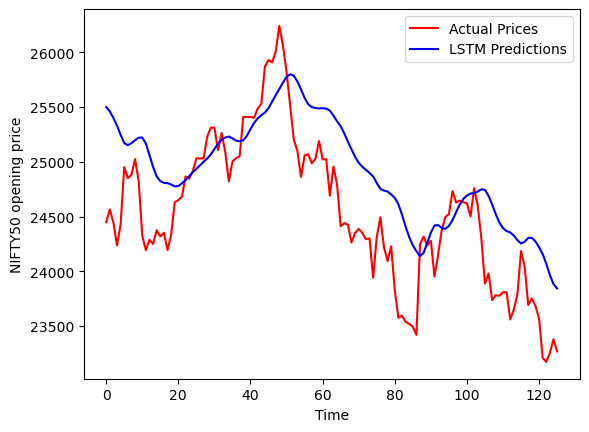

In [59]:
plt.plot(real_prices, color = 'Red' , label="Actual Prices")
plt.plot(predictions, color = 'Blue', label="LSTM Predictions")
plt.xlabel("Time")
plt.ylabel("NIFTY50 opening price")
plt.legend()

In [64]:
mse = mean_squared_error(real_prices, predictions)
np.sqrt(mse)

542.1678421667062

In [68]:
r2  = r2_score(real_prices, predictions)
r2

0.3387961716436386